# Graded Exercise 1: Quadratic integrate and fire

first name: Mert

last name: Ertugrul

sciper: 319933

date: 29.03.2020

*Your teammate*

first name of your teammate: Alexander

last name of your teammate: Möllers

sciper of your teammate: 325293


Note: You are allowed to discuss the concepts with your class mates. You are not allowed to share code. You have to understand every line of code you write in this notebook. We will ask you questions about your submission during a fraud detection session during the last week of the semeste

## 1.1 Quadratic Integrate and Fire neuron [20 points]
This exercise is not available online. All information is given here.

1.1.1 Read the book chapter about the quadratic integrate and fire neuron
https://neuronaldynamics.epfl.ch/online/Ch5.S3.html

[0 point]

1.1.2 Implement the quadratic integrate and fire neuron in Brian2:

* Follow the [source]-link in the documentation to get the Python source code of the exponential integrate and fire neuron. https://lcn-neurodynex-exercises.readthedocs.io/en/latest/modules/neurodynex3.exponential_integrate_fire.html
* Find the one function that implements the exponential LIF. Copy that function into this notebook. Rename the function, change it's parameters and modify the dynamics from the exponential to the quadratic equation (Equation 5.16 in the book).

[6 points]

1.1.3 Call your function: 
As above, inject a current into your neuron and plot the response.


[2 points]

1.1.4 Approximate the exponential model
* The quadratic model has three parameters: a0, v_rest and vc (note that this v_rest is different from the v_rest of the exponential model). They can be chosen such that the quadratic model approximates the exponential model. Read the box "Example: Approximating the exponential integrate-and-fire" in chapter http://neuronaldynamics.epfl.ch/online/Ch5.S3.html and make sure you understand figure 5.8.
* On paper, find the equations that express the parameters a0, v_rest and vc (in terms of the parameters of the exponential model) such that the two models are matched (in value, slope and curvature) at the rheobase threshold.
* In code, compute the values of a0, v_rest and vc using the values provided in the exp_IF module.


[4 points]

1.1.5 Simulate the quadratic- and the exponential model
* Inject the same current into an exponential- and into your (matched) quadratic model. Set the current duration to 1 second and the amplitude to I_Rh + 0.030 * b2.namp  (I_Rh as computed in exercise 3.1). Simulate for 1 second and plot the voltage responses.


** Link to the exercise 3.1 **

<http://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/exponential-integrate-and-fire.html>

[3 point]

1.1.6 Discuss your observation


[5 point]


In [1]:
import neurodynex3.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex3.tools import plot_tools, input_factory
import brian2 as b2
import matplotlib.pyplot as plt
import warnings


### 1.1.2 : Quadratic Integrate and Fire 

In [2]:
def simulate_quadratic_IF_neuron(       alpha,
                                        v_rest,  
                                        v_critical,
                                 
                                        tau = exp_IF.MEMBRANE_TIME_SCALE_tau, 
                                        R = exp_IF.MEMBRANE_RESISTANCE_R,  
                                        v_reset = exp_IF.V_RESET, 
           
                                        v_spike = exp_IF.FIRING_THRESHOLD_v_spike, 
                                        I_stim = input_factory.get_zero_current(),
                                        simulation_time = 200 * b2.ms  ):
    
    #default parameter values are chosen according to book values
    
    """
    Implements the dynamics of the quadratic Integrate-and-fire model

    Args:
        tau (Quantity): Membrane time constant
        R (Quantity): Membrane resistance
        apha (Quantity): determines sharphess of the parabola
        
        v_rest (Quantity): Resting potential
        v_reset (Quantity): Reset value (vm after spike)
        v_critical (Quantity): critical voltage fro spike by current pulse
        v_spike (Quantity) : voltage threshold for the spike condition

        I_stim (TimedArray): Input current
        simulation_time (Quantity): Duration for which the model is simulated

    Returns:
        (voltage_monitor, spike_monitor):
        A b2.StateMonitor for the variable "v" and a b2.SpikeMonitor
    """

    eqs = """
    dv/dt = ( alpha*(v-v_rest)*(v-v_critical) + R*I_stim(t,i))/(tau) : volt
    """
    neuron = b2.NeuronGroup(1, model=eqs, reset="v=v_reset", threshold="v>v_spike", method="euler")
    neuron.v = v_rest
    
    # monitoring membrane potential of neuron and injecting current
    voltage_monitor = b2.StateMonitor(neuron, ["v"], record=True)
    spike_monitor = b2.SpikeMonitor(neuron)

    # run the simulation
    net = b2.Network(neuron, voltage_monitor, spike_monitor)
    net.run(simulation_time)

    return voltage_monitor, spike_monitor


### 1.1.3: Test Run of the Quadratic Integrate and Fire

WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 14.0 is required. Get it with "Build Tools for Visual Studio": https://visualstudio.microsoft.com/downloads/ (DistutilsPlatformError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


number of spikes: 13


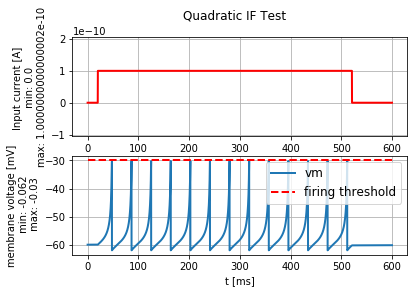

In [3]:
#1.1.3 Since the parameters are not yet matched to approxiamte the exponential model, they are chosen arbitrarily 
#to test the function for this part.


tes_v_crit = -50 * b2.mV
test_v_rest =  -60  * b2.mV
test_v_reset = -62.0 * b2.mV
test_alpha = 0.2 / b2.mV


input_current_test = input_factory.get_step_current(
    t_start=20, t_end=520, unit_time=b2.ms, amplitude= 0.1*b2.namp)


state_monitor_test, spike_monitor_test = simulate_quadratic_IF_neuron( alpha=test_alpha, v_rest=test_v_rest, 
     v_reset=test_v_reset, v_critical=test_v_rest, I_stim=input_current_test, simulation_time=600*b2.ms)

plot_tools.plot_voltage_and_current_traces(
        state_monitor_test, input_current_test, title="Quadratic IF Test", firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("number of spikes: {}".format(spike_monitor_test.count[0]))


### 1.1.4: Matching Parameters

In [4]:
# 1.1.4 Approximate the exponential model (solve it on paper, use the final expressions here)

A_0 = 1/(2 * exp_IF.SHARPNESS_delta_T) 
print(A_0)
V_rest = -b2.sqrt((exp_IF.RHEOBASE_THRESHOLD_v_rh-exp_IF.V_REST-exp_IF.SHARPNESS_delta_T)*2*exp_IF.SHARPNESS_delta_T)+exp_IF.RHEOBASE_THRESHOLD_v_rh
print(V_rest)
V_C = b2.sqrt((exp_IF.RHEOBASE_THRESHOLD_v_rh-exp_IF.V_REST -exp_IF.SHARPNESS_delta_T)*2*exp_IF.SHARPNESS_delta_T )+exp_IF.RHEOBASE_THRESHOLD_v_rh
print(V_C)

250. m^-2 kg^-1 s^3 A
-60.65685425 mV
-49.34314575 mV


### 1.1.5: Comparing Models

Rheobase Current: 0.4 nA
number of spikes for Exponential IF: 12


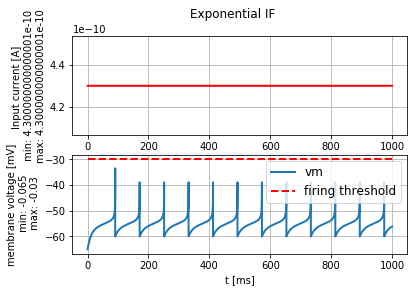

In [5]:
# 1.1.5 Simulate the quadratic- and the exponential model

# your code goes here. Use the parameters A_0 V_rest and V_C computed in 3.3.4

I_Rh = ( exp_IF.RHEOBASE_THRESHOLD_v_rh - exp_IF.V_REST - exp_IF.SHARPNESS_delta_T ) / exp_IF.MEMBRANE_RESISTANCE_R
print("Rheobase Current: {} nA".format( round( I_Rh/b2.nA ,4 ) ) )

input_current = input_factory.get_step_current(
    t_start=0, t_end=1000, unit_time=b2.ms, amplitude= I_Rh + 0.03 * b2.namp)


state_monitor1, spike_monitor1 = exp_IF.simulate_exponential_IF_neuron(
        I_stim=input_current, simulation_time=1000*b2.ms)

fig1 = plt.figure()
plot_tools.plot_voltage_and_current_traces(
        state_monitor1, input_current, title="Exponential IF ", firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("number of spikes for Exponential IF: {}".format(spike_monitor1.count[0]))



The graph of the Exponential IF shows the spikes as if they are not reaching the threshold but this is not the case, the simulation works properly and produces the right results. 

number of spikes for Quadratic IF: 11


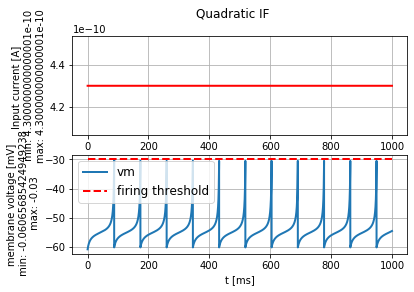

In [6]:
state_monitor2, spike_monitor2 = simulate_quadratic_IF_neuron(alpha=A_0, v_rest=V_rest, v_critical=V_C,
        I_stim=input_current, simulation_time=1000*b2.ms)

plot_tools.plot_voltage_and_current_traces(
        state_monitor2, input_current, title="Quadratic IF ", firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("number of spikes for Quadratic IF: {}".format(spike_monitor2.count[0]))


Now both IF models will be shown in the same graph for easier comparison

In [7]:
warnings.filterwarnings('ignore')

(<matplotlib.axes._subplots.AxesSubplot at 0x1f9e253da30>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f9e251e880>)

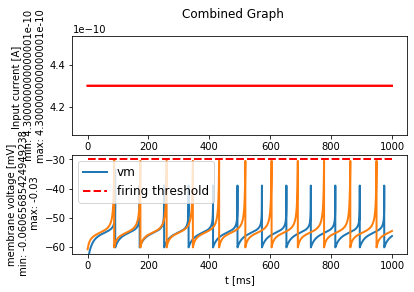

In [8]:
plot_tools.plot_voltage_and_current_traces(
        state_monitor1, input_current, firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
plot_tools.plot_voltage_and_current_traces(
        state_monitor2, input_current, title="Combined Graph ", firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)


## 1.1.6 Discuss your observation

Explain your observations here. Qualitatively compare the voltage traces of the exponential- and the quadratic model. Is the number of spikes the same for the two models?

For the first four spikes, firing time and the curvature of the spikes are well approximated. However, the firing frequency for the two models is not exactly the same, and after approximately four spikes, the firing times fall out of sync.

Hence, by the end of the simulation, the two simulations become desyncronized enough that the quadratic IF model's simulation falls behind by one spike, producing a total of 11 spikes while the exponnetial model produces 12. 

Other than this discrepancy, a small difference in the curavture of the two spikes is present. The quadratic model produces a faster voltage rise before approximately -55mV and afterwards it is slower than the expoentail model. This is because:
* before the rheobase voltage, the quadratic model has a nonlinear region where dv/dt rises faster than the exponential model.
* after the rheobase votlage, the quadratic model's curvature for dv/dt is not as steep as the exponential model so dv/dt rises slower.

# Ex. 2. AdEx: the Adaptive Exponential Integrate-and-Fire model

Use function [`AdEx.simulate_AdEx_neuron()`](https://lcn-neurodynex-exercises.readthedocs.io/en/latest/modules/neurodynex3.adex_model.html) to run the model for different input currents and different parameters. Get started by running the following script:

(<matplotlib.axes._subplots.AxesSubplot at 0x1f9e23dfc70>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f9e1f34880>)

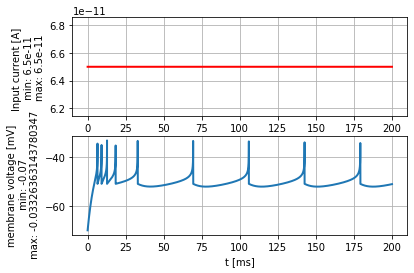

In [9]:
%matplotlib inline
import brian2 as b2
from neurodynex3.adex_model import AdEx
from neurodynex3.tools import plot_tools, input_factory

current1 = input_factory.get_step_current(0, 200, 1. * b2.ms, 65.0 * b2.pA)
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(I_stim=current1,
                                                         simulation_time=200 * b2.ms)
plot_tools.plot_voltage_and_current_traces(state_monitor, current1)




## 2.1. Exercise: Adaptation and firing patterns [7 points]

We have implemented an Exponential Integrate-and-Fire model with a single adaptation current
$\begin{split}\left[\begin{array}{ccll}
{\displaystyle \tau_m \frac{du}{dt}} &=& -(u-u_{rest}) + \Delta_T exp(\frac{u-\vartheta_{rh}}{\Delta_T}) - R w + R I(t) \\[.2cm]
{\displaystyle \tau_w \frac{dw}{dt}} &=& a (u-u_{rest}) -w  + b \tau_w \sum_{t^{(f)}} \delta (t - t^{(f)})
 \\[.2cm]
\end{array}\right.\end{split}$

- When you simulate the model with the default parameters, it produces the voltage trace shown above. Describe that firing pattern. Use the terminology of Fig. 6.1 in [Chapter 6.1](https://neuronaldynamics.epfl.ch/online/Ch6.S1.html) [max 2 lines, 1 point]

Answer:  In the simulation above we can see that the spike pattern resembles a small inital burst.The spike pattern then adapts. 

- Call the function `AdEx.simulate_AdEx_neuron()` with different parameters and try to create adapting, bursting and irregular firing patterns. Table 6.1 in Chapter 6.1 provides a starting point for your explorations. 

**Note:** If you want to set a parameter to 0, Brian still expects a unit. Therefore use `a=0*b2.nS` instead of `a=0`.

If you do not specify any parameter, the following default values are used:

`MEMBRANE_TIME_SCALE_tau_m = 5 * b2.ms`

`MEMBRANE_RESISTANCE_R = 500*b2.Mohm`

`V_REST = -70.0 * b2.mV`

`V_RESET = -51.0 * b2.mV`

`RHEOBASE_THRESHOLD_v_rh = -50.0 * b2.mV`

`SHARPNESS_delta_T = 2.0 * b2.mV`

`ADAPTATION_VOLTAGE_COUPLING_a = 0.5 * b2.nS`

`ADAPTATION_TIME_CONSTANT_tau_w = 100.0 * b2.ms`

`SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b = 7.0 * b2.pA`

[2 points]

(<matplotlib.axes._subplots.AxesSubplot at 0x1f9e3597760>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f9e36239d0>)

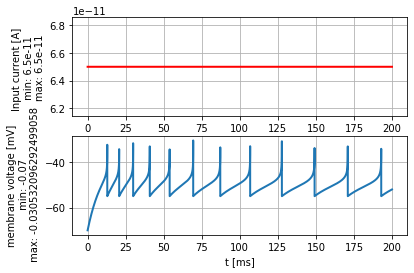

In [10]:

# adapting 
%matplotlib inline
import brian2 as b2

current1 = input_factory.get_step_current(0, 200, 1. * b2.ms, 65.0 * b2.pA)
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(tau_m=10 * b2.ms, v_reset = -55 * b2.mV,a=0 * b2.nS,b = 5 * b2.pA, I_stim=current1,
                                                         simulation_time=200 * b2.ms)
plot_tools.plot_voltage_and_current_traces(state_monitor, current1)

[2 points]

(<matplotlib.axes._subplots.AxesSubplot at 0x1f9e3608130>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f9e36ad520>)

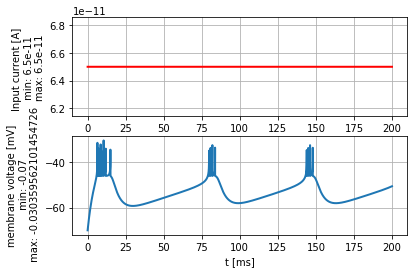

In [11]:
# bursting firing pattern from book
%matplotlib inline
import brian2 as b2

current = input_factory.get_step_current(0, 1000, 1. * b2.ms, 65.0 * b2.pA)
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(tau_m=5 * b2.ms, v_reset = -46 * b2.mV,a=-0.5 * b2.nS,b = 7 * b2.pA, I_stim=current,
                                                         simulation_time=200 * b2.ms)

plot_tools.plot_voltage_and_current_traces(state_monitor, current)

[2 points]

(<matplotlib.axes._subplots.AxesSubplot at 0x1f9e19d94f0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f9e37692e0>)

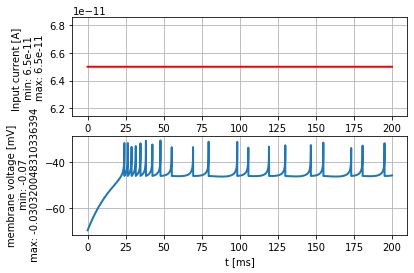

In [12]:
# irregular firing pattern
%matplotlib inline
import brian2 as b2

current = input_factory.get_step_current(0, 1000, 1. * b2.ms, 65.0 * b2.pA)
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(tau_m=19 * b2.ms, v_reset = -46 * b2.mV,a=-0.5 * b2.nS,b = 7 * b2.pA, I_stim=current,
                                                         simulation_time=200 * b2.ms)

plot_tools.plot_voltage_and_current_traces(state_monitor, current)

## 2.2. Exercise: phase plane and nullclines [12 points]

First, try to get some intuition on shape of nullclines by plotting or simply sketching them on a piece of paper and answering the following questions.
Plot or sketch the u- and w- nullclines of the AdEx model (`I(t) = 0`)
- What is the direction of the flow arrows on the u-nullcline ?
- How do the nullclines change with respect to `a`?
- What is the interpretation of parameter `b`?
- How do flow arrows change as tau_w gets bigger?

[max 10 lines, 4 points]

Answer:

On the u-nullcline the flow in the u direction is by definition zero. So the direction of the flow arrows is in w-direction (Given that it is not at fixed point). If w is on the y-axis, then it's in the vertical direction.

The slope of the w nullcline changes with a. The u nullcline does not change.

b is used to model adaption in the AdEx model. It is the amount the adaption variable w is increased by after every spike. Generally, the larger b the more adaption. 

A large tau_w means that w is changing slower. That is, the w-component of the flow arrows will be reduced and the will be more horizontal (if that is the u-axis) than they were before. 

Take `a = 0`. Find a set of parameters such that, by changing `b` only, we can see two qualitatively different firing patterns. Simulate these two patterns and write their names.

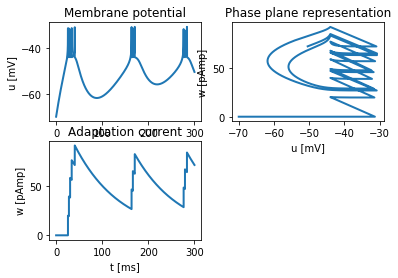

In [13]:
# First firing pattern (simulation [2 points] and pattern name [2 points])

#This pattern is a Regular burst pattern
%matplotlib inline
import brian2 as b2

current = input_factory.get_step_current(0, 1000, 1. * b2.ms, 65.0 * b2.pA)
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(tau_m=50 * b2.ms, v_reset = -44 * b2.mV,a=0 * b2.nS,b = 20* b2.pA, I_stim=current,
                                                         simulation_time=300 * b2.ms,v_rheobase = -50 * b2.mV, R = 1000*b2.Mohm)

plot_tools.plot_voltage_and_current_traces(state_monitor, current)
AdEx.plot_adex_state(state_monitor)

[4 points]

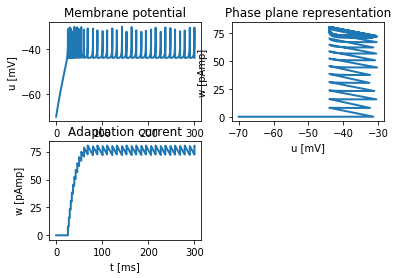

In [14]:
# Second firing pattern (simulation [2 points] and pattern name [2 points])
#This pattern is an initial burst pattern
%matplotlib inline
import brian2 as b2

current = input_factory.get_step_current(0, 1000, 1. * b2.ms, 65.0 * b2.pA)
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(tau_m=50 * b2.ms, v_reset = -44 * b2.mV,a=0 * b2.nS,b = 8* b2.pA, I_stim=current,
                                                         simulation_time=300 * b2.ms,v_rheobase = -50 * b2.mV, R = 1000*b2.Mohm)

plot_tools.plot_voltage_and_current_traces(state_monitor, current)
AdEx.plot_adex_state(state_monitor)